In [32]:
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np


# step 2

df = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-a-svechkov-8/Module 6/Lesson 2/conversion.csv', sep=',')
df






ad_id  xyz_campaign_id  fb_campaign_id    age gender  interest  \
0      708746              916          103916  30-34      M        15   
1      708749              916          103917  30-34      M        16   
2      708771              916          103920  30-34      M        20   
3      708815              916          103928  30-34      M        28   
4      708818              916          103928  30-34      M        28   
...       ...              ...             ...    ...    ...       ...   
1138  1314410             1178          179977  45-49      F       109   
1139  1314411             1178          179978  45-49      F       110   
1140  1314412             1178          179979  45-49      F       111   
1141  1314414             1178          179981  45-49      F       113   
1142  1314415             1178          179982  45-49      F       114   

      Impressions  Clicks       Spent  Total_Conversion  Approved_Conversion  
0            7350       1    1.430000                 2                    1  
1           17861       2    1.820000                 2                    0  
2             693       0    0.000000                 1                    0  
3            4259       1    1.250000                 1                    0  
4            4133       1    1.290000                 1                    1  
...           ...     ...         ...               ...                  ...  
1138      1129773     252  358.189997                13                    2  
1139       637549     120  173.880003                 3                    0  
1140       151531      28   40.289999                 2                    0  
1141       790253     135  198.710000                 8                    2  
1142       513161     114  165.609999                 5                    2  

[1143 rows x 11 columns]

In [33]:
df.isna().sum()

ad_id                  0
xyz_campaign_id        0
fb_campaign_id         0
age                    0
gender                 0
interest               0
Impressions            0
Clicks                 0
Spent                  0
Total_Conversion       0
Approved_Conversion    0
dtype: int64

In [34]:
df.nunique()

ad_id                  1143
xyz_campaign_id           3
fb_campaign_id          691
age                       4
gender                    2
interest                 40
Impressions            1130
Clicks                  183
Spent                   869
Total_Conversion         32
Approved_Conversion      16
dtype: int64

/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


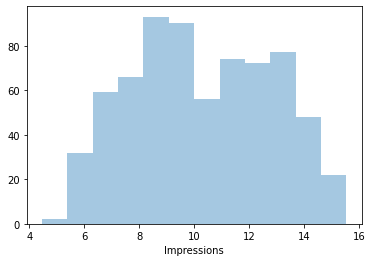

In [35]:
# step 3

sns.distplot(np.log(df.groupby(['fb_campaign_id']).Impressions.sum()), kde=False)




In [36]:
# step 4

df['CTR'] = df.Clicks / df.Impressions

df

ad_id  xyz_campaign_id  fb_campaign_id    age gender  interest  \
0      708746              916          103916  30-34      M        15   
1      708749              916          103917  30-34      M        16   
2      708771              916          103920  30-34      M        20   
3      708815              916          103928  30-34      M        28   
4      708818              916          103928  30-34      M        28   
...       ...              ...             ...    ...    ...       ...   
1138  1314410             1178          179977  45-49      F       109   
1139  1314411             1178          179978  45-49      F       110   
1140  1314412             1178          179979  45-49      F       111   
1141  1314414             1178          179981  45-49      F       113   
1142  1314415             1178          179982  45-49      F       114   

      Impressions  Clicks       Spent  Total_Conversion  Approved_Conversion  \
0            7350       1    1.430000                 2                    1   
1           17861       2    1.820000                 2                    0   
2             693       0    0.000000                 1                    0   
3            4259       1    1.250000                 1                    0   
4            4133       1    1.290000                 1                    1   
...           ...     ...         ...               ...                  ...   
1138      1129773     252  358.189997                13                    2   
1139       637549     120  173.880003                 3                    0   
1140       151531      28   40.289999                 2                    0   
1141       790253     135  198.710000                 8                    2   
1142       513161     114  165.609999                 5                    2   

           CTR  
0     0.000136  
1     0.000112  
2     0.000000  
3     0.000235  
4     0.000242  
...        ...  
1138  0.000223  
1139  0.000188  
1140  0.000185  
1141  0.000171  
1142  0.000222  

[1143 rows x 12 columns]

In [45]:
df.iloc[df.CTR.idxmax()].ad_id

738637

In [47]:
df.CTR.describe()

count    1143.000000
mean        0.000164
std         0.000115
min         0.000000
25%         0.000100
50%         0.000160
75%         0.000234
max         0.001059
Name: CTR, dtype: float64

/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

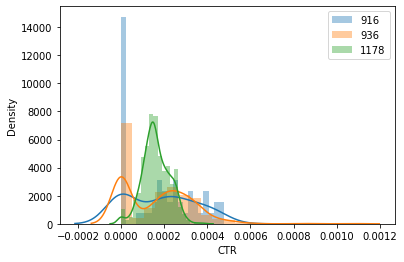

In [44]:
# step 5

for i in df.xyz_campaign_id.unique():
    sns.distplot(df.query(f"xyz_campaign_id == {i}").CTR, bins=20,label=f'{i}');
    
plt.legend()
plt.show()


# sns.distplot(df.query("xyz_campaign_id == 916").CTR, bins=20);


# sns.distplot(df.query("xyz_campaign_id == 936").CTR, bins=20);


# sns.distplot(df.query("xyz_campaign_id == 1178").CTR, bins=20);



In [25]:
df.xyz_campaign_id.unique()

array([ 916,  936, 1178])

In [28]:
for i in df.xyz_campaign_id.unique():
    print(i)

916
936
1178


In [40]:
df.query("xyz_campaign_id == '916'").CTR

0     0.000136
1     0.000112
2     0.000000
3     0.000235
4     0.000242
5     0.000000
6     0.000192
7     0.000091
8     0.000425
9     0.000316
10    0.000000
11    0.000000
12    0.000000
13    0.000000
14    0.000477
15    0.000000
16    0.000434
17    0.000000
18    0.000216
19    0.000190
20    0.000000
21    0.000280
22    0.000164
23    0.000164
24    0.000000
25    0.000000
26    0.000269
27    0.000209
28    0.000182
29    0.000000
30    0.000000
31    0.000294
32    0.000254
33    0.000438
34    0.000458
35    0.000000
36    0.000243
37    0.000324
38    0.000199
39    0.000181
40    0.000000
41    0.000000
42    0.000186
43    0.000315
44    0.000000
45    0.000384
46    0.000399
47    0.000341
48    0.000359
49    0.000262
50    0.000357
51    0.000000
52    0.000398
53    0.000000
Name: CTR, dtype: float64

/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

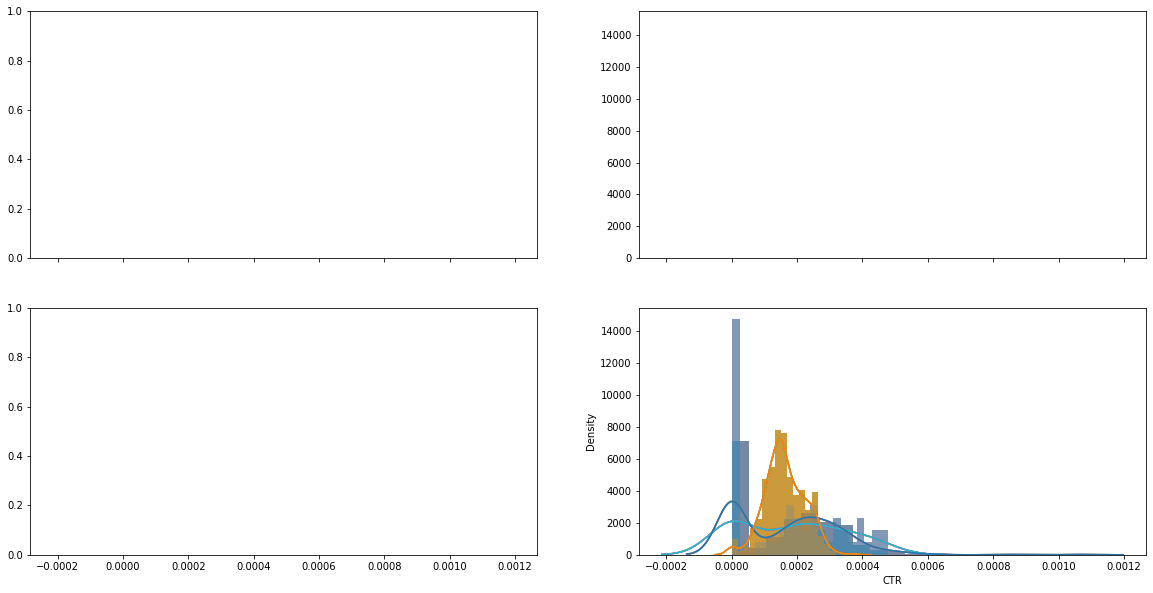

In [41]:
import matplotlib.dates as mdates

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 10), sharey='col', sharex=True)

windows = [2, 20, 30, 40]
colors = ['coral', 'blue', 'green', 'purple']

for window, ax, color in zip(windows, axes.flatten(), colors): 
    for i in df.xyz_campaign_id.unique():
        sns.distplot(df.query(f"xyz_campaign_id == {i}").CTR, bins=20);

In [48]:
# step 7

df['CPC'] = df.Spent / df.Clicks

df

ad_id  xyz_campaign_id  fb_campaign_id    age gender  interest  \
0      708746              916          103916  30-34      M        15   
1      708749              916          103917  30-34      M        16   
2      708771              916          103920  30-34      M        20   
3      708815              916          103928  30-34      M        28   
4      708818              916          103928  30-34      M        28   
...       ...              ...             ...    ...    ...       ...   
1138  1314410             1178          179977  45-49      F       109   
1139  1314411             1178          179978  45-49      F       110   
1140  1314412             1178          179979  45-49      F       111   
1141  1314414             1178          179981  45-49      F       113   
1142  1314415             1178          179982  45-49      F       114   

      Impressions  Clicks       Spent  Total_Conversion  Approved_Conversion  \
0            7350       1    1.430000                 2                    1   
1           17861       2    1.820000                 2                    0   
2             693       0    0.000000                 1                    0   
3            4259       1    1.250000                 1                    0   
4            4133       1    1.290000                 1                    1   
...           ...     ...         ...               ...                  ...   
1138      1129773     252  358.189997                13                    2   
1139       637549     120  173.880003                 3                    0   
1140       151531      28   40.289999                 2                    0   
1141       790253     135  198.710000                 8                    2   
1142       513161     114  165.609999                 5                    2   

           CTR       CPC  
0     0.000136  1.430000  
1     0.000112  0.910000  
2     0.000000       NaN  
3     0.000235  1.250000  
4     0.000242  1.290000  
...        ...       ...  
1138  0.000223  1.421389  
1139  0.000188  1.449000  
1140  0.000185  1.438929  
1141  0.000171  1.471926  
1142  0.000222  1.452719  

[1143 rows x 13 columns]

In [50]:
import scipy.stats as ss

round(ss.iqr(df.CPC,nan_policy='omit'),2)



0.25

/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


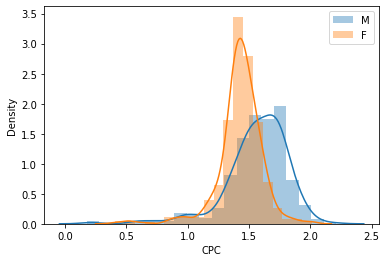

In [53]:
# step 8

for i in df.gender.unique():
    sns.distplot(df.query(f"gender == '{i}'").CPC.dropna(), bins=20,label=f'{i}');
    
plt.legend()
plt.show()




In [62]:
# step 9


step_9_record = df.query("ad_id == '1121814'")

round((step_9_record.Approved_Conversion / step_9_record.Clicks) * 100, 2)


860    3.09
dtype: float64

In [57]:
step_9_record

ad_id  xyz_campaign_id  fb_campaign_id    age gender  interest  \
860  1121814             1178          144659  30-34      F        27   

     Impressions  Clicks       Spent  Total_Conversion  Approved_Conversion  \
860      2223278     421  612.300003                38                   13   

          CTR       CPC  
860  0.000189  1.454394